# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organizing Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

## Challenge

In this challenge, you need to implement a SOM such that it can categorise a set of random 3-dimensional colours.  The output should be an image of the organised data.  

### Expectations
- You are expected to detail your decisions & thinking in comments
- You may use any language you like (although the examples given below are using Python)
- Avoid using too many libraries that would do too much of the work for you. For example, in Python a good approach would be to use only functions from `numpy` (together with in-built libs if needed)
- Try and make your code as efficient as possible. Feel free to deviate from a literal interpretation of the instructions given under the **Training** heading above in the interest of code efficiency
- Consider the best way to structure your code for later use by other developers or in anticipation of productionisation
- Include any tests you may have used (tests not required however)
- You can use code below to generate the trainig data of 10 colours:

In [1]:
# Generate Data
import numpy as np
input_data = np.random.random((10,3))
input_data

array([[0.82494804, 0.79887754, 0.01458952],
       [0.12694774, 0.03863168, 0.95697192],
       [0.78125848, 0.85719116, 0.90160076],
       [0.6136289 , 0.45903315, 0.24418686],
       [0.13117506, 0.9182964 , 0.33539107],
       [0.890784  , 0.49890261, 0.54835116],
       [0.92610839, 0.81662801, 0.53372498],
       [0.30722054, 0.50871836, 0.54946781],
       [0.34084634, 0.66064928, 0.38284708],
       [0.22767982, 0.78378148, 0.90023542]])

### 1. Implement a Kohonen network
- Use the above description to implement a Kohonen network
- Make sure you can configure the size of the input vector and the size of the map
- Make sure node's weights are initialized to random values

In [2]:
from datetime import datetime
import time
from functools import wraps
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def fn_timer(function):
    """
        timer decorator.
    """
    @wraps(function)
    def function_timer(*args, **kwargs):
        start = time.time()
        result = function(*args, **kwargs)
        end   = time.time()
        print ("Total time: {} seconds".format(round(end-start, 3)))
        return result

    return function_timer

In [4]:
class SOM(object):

    def __init__(self, h, w, dim):
        """
            Define the structure.
        """
        self.shape = (h, w, dim)
        self.W = np.zeros(self.shape)
        
        self.alpha0  = 0.0
        self.lam     = 0.0
        self.sigma0  = 0.0
        
        self.input_data = []
        
    @fn_timer
    def train(self, input_vector, alpha0, sigma0, n_maxiterations, initializer=np.random.rand):
        """ 
            Train, then return the result: W
        """
        self.input_data = input_vector
        self.alpha0     = alpha0
        self.sigma0     = sigma0
        self.W          = initializer(*self.shape)    # init by random numbers between 0 and 1 as default.
        self.lam        = self.const_lambda(n_maxiterations, self.sigma0) 
        
        input_index_range = range(len(input_data))
        for t in range(n_maxiterations):   
            i_data = np.random.choice(input_index_range)
            bmu = self.find_bmu(input_data[i_data])
            self.update_weights(bmu, input_data[i_data], t)

        return self.W

    # --------------------------------------------------------------

    def get_l2_distance(self, v1, v2):          
        """
            Calculate the Euclidean distance between v1 and v2.
        """
        return np.linalg.norm( (v1 - v2) )

    def exponential_decay(self, lam, t):
        """
            Exponential decay function.
        """
        return np.exp(-t/lam) 
    
    def find_bmu(self, input_vec):
        """
            Find the (y,x) of winner as BMU of one given input vector.
        """
        dist_pt  = (0,0)
        dist_min = self.get_l2_distance(input_vec, self.W[dist_pt])
        
        for y in range(self.shape[0]):
            for x in range(self.shape[1]):
                dist = self.get_l2_distance(input_vec, self.W[y,x])
                # find the closest one.
                if dist < dist_min:
                    dist_min = dist
                    dist_pt  = (y,x)
        return dist_pt

    def get_neighbourhood_area(self, bmu, radius):
        """
            Calculate left, right, top, buttom of the neighbourhood area.
        """
        y_top = 0
        if bmu[0] - radius < 0:
            y_top = 0
        else:
            y_top = bmu[0] - radius
            
        y_buttom = 0
        if bmu[0] + radius >= self.shape[0]:
            y_buttom = self.shape[0] - 1
        else:
            y_buttom = bmu[0] + radius
            
        x_left = 0
        if bmu[1] - radius < 0:
            x_left = 0
        else:
            x_left = bmu[1] - radius
            
        x_right = 0
        if bmu[1] + radius >= self.shape[1]:
            x_right = self.shape[1] - 1
        else:
            x_right = bmu[1] + radius
        
        return (round(y_top), round(y_buttom), round(x_left), round(x_right))

    def update_weights(self, bmu, V, t):
        """ 
            Updating the weights within the BMU's neighbourhood. 
        """
        cur_alpha = self.alpha(t)
        cur_sigma = self.sigma(t)
        y_top, y_buttom, x_left, x_right = self.get_neighbourhood_area(bmu, cur_sigma)
        
        # Only scan the possible nodes of neighbourhood.
        for y in range(y_top, y_buttom+1):
            for x in range(x_left, x_right+1):
                dist_to_bmu = self.get_l2_distance(np.array(bmu), np.array((y,x)))
                # Only update weights whthin neighbourhood.
                if dist_to_bmu <= cur_sigma:
                    self.W[(y,x)] += cur_alpha * self.theta(dist_to_bmu, t) * (V - self.W[(y,x)])

    def const_lambda(self, n_maxiterations, sigma0):
        """
            Calculating the time constant 𝜆
        """
        return n_maxiterations / np.log(sigma0) 
                
    def alpha(self, t):
        """
            Calculating the learning rate 𝛼𝑡 at iteration number 𝑡
        """
        return self.alpha0 * self.exponential_decay(self.lam, t)

    def theta(self, dist_to_bmu, t):
        """ 
            Calculating the influence
        """
        return np.exp( -(dist_to_bmu**2) / (2 * (self.sigma(t)**2) ))

    def sigma(self, t):
        """
            Calculating the neighbourhood radius 𝜎𝑡 at iteration number 𝑡
        """
        return self.sigma0 * self.exponential_decay(self.lam, t)


### 2. Train a 10x10 network over 100 iterations

- Training data is a random set of 20 colours
- How long does this take?
- What does the map look like? (You will need to translate the weights of each node in the map to pixel data)
- What does this look like if you perform 200 & 500 iterations?

You should end up with something that looks like below after 500 iterations:

#### 2.1 Training data is a random set of 20 colours

In [5]:
const_colour_size = 20

input_data = np.random.random((const_colour_size, 3))
input_data

array([[0.50062725, 0.69085105, 0.65769702],
       [0.21208971, 0.1637656 , 0.704231  ],
       [0.20370875, 0.415691  , 0.835388  ],
       [0.90955589, 0.6132664 , 0.78671001],
       [0.16563877, 0.68337962, 0.56461739],
       [0.66168825, 0.10394428, 0.87529332],
       [0.86732323, 0.39103137, 0.0290002 ],
       [0.73640867, 0.91615045, 0.21973174],
       [0.10645609, 0.25266383, 0.48896953],
       [0.66289161, 0.5333653 , 0.07686705],
       [0.59846122, 0.15888014, 0.19313713],
       [0.84857957, 0.11213075, 0.2388    ],
       [0.49671867, 0.31271434, 0.36998297],
       [0.02903652, 0.09428119, 0.85361324],
       [0.99290221, 0.71818208, 0.70452145],
       [0.99591243, 0.23460436, 0.07782941],
       [0.72315255, 0.08308792, 0.22272652],
       [0.63905883, 0.69214397, 0.64440551],
       [0.93256248, 0.18842809, 0.9257246 ],
       [0.10778896, 0.36993398, 0.19590195]])

#### 2.2 How long does this take?

In [6]:
const_h = 10
const_w = 10
const_iterations = 100

som = SOM(const_h, const_w, 3)
image_data = som.train(input_data, alpha0=0.1, sigma0=max(const_h, const_w)/2, n_maxiterations=const_iterations)

Total time: 0.084 seconds


#### 2.3 What does the map look like?

(10, 10, 3)


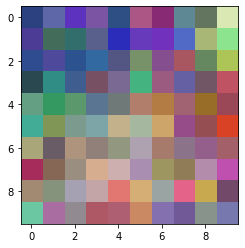

In [7]:
plt.imshow(image_data)
print(image_data.shape)

#### 2.4 What does this look like if you perform 200 & 500 iterations

Total time: 0.166 seconds


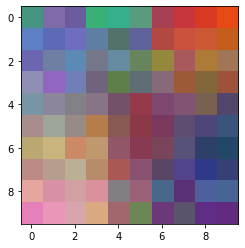

In [8]:
const_h = 10
const_w = 10
const_iterations = 200

som = SOM(const_h, const_w, 3)
image_data = som.train(input_data, alpha0=0.1, sigma0=max(const_h, const_w)/2, n_maxiterations=const_iterations)
plt.imshow(image_data)

Total time: 0.405 seconds


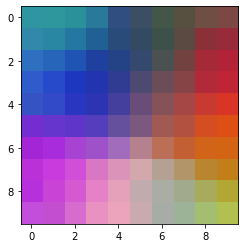

In [9]:
const_h = 10
const_w = 10
const_iterations = 500

som = SOM(const_h, const_w, 3)
image_data = som.train(input_data, alpha0=0.1, sigma0=max(const_h, const_w)/2, n_maxiterations=const_iterations)
plt.imshow(image_data)

### 3. Train a 100x100 network over 1000 iterations

- This network will likely be significantly slower to train
- What could you do to improve performance?
- What does the network look like after 1000 iterations?

You should end up with something like below:

#### This network will likely be significantly slower to train

In [10]:
const_h = 100
const_w = 100
const_iterations = 1000

som = SOM(const_h, const_w, 3)
image_data = som.train(input_data, alpha0=0.1, sigma0=max(const_h, const_w)/2, n_maxiterations=const_iterations)

Total time: 53.015 seconds


#### What could you do to improve performance?

The influence decays over time according to Gaussian function:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

The exponential function is complex to calculate, thus the discrete function can be considered as its alternative.

#### What does the network look like after 1000 iterations?

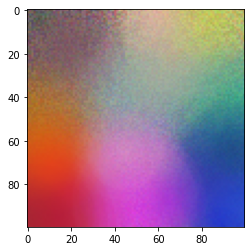

In [11]:
plt.imshow(image_data)

#### What does the network look like after 2000 iterations?

Total time: 119.321 seconds


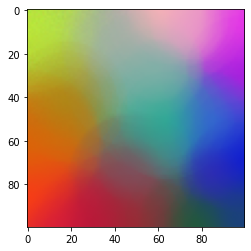

In [12]:
const_h = 100
const_w = 100
const_iterations = 2000

som = SOM(const_h, const_w, 3)
image_data = som.train(input_data, alpha0=0.1, sigma0=max(const_h, const_w)/2, n_maxiterations=const_iterations)
plt.imshow(image_data)

#### What does the network look like after 3000 iterations?

Total time: 187.349 seconds


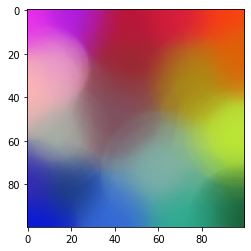

In [13]:
const_h = 100
const_w = 100
const_iterations = 3000

som = SOM(const_h, const_w, 3)
image_data = som.train(input_data, alpha0=0.1, sigma0=max(const_h, const_w)/2, n_maxiterations=const_iterations)
plt.imshow(image_data)

#### What does the network look like after 9000 iterations?

Total time: 523.456 seconds


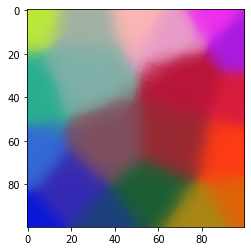

In [14]:
const_h = 100
const_w = 100
const_iterations = 9000

som = SOM(const_h, const_w, 3)
image_data = som.train(input_data, alpha0=0.1, sigma0=max(const_h, const_w)/2, n_maxiterations=const_iterations)
plt.imshow(image_data)